In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
mnist = fetch_openml('mnist_784')
X, y = mnist.data.astype('float64'), mnist.target.astype('int64')

/home/nilabha/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.sample(n=2000)
y_train = y_train.loc[X_train.index]

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kpca_train = kpca.fit_transform(X_train_std)
X_kpca_test = kpca.transform(X_test_std)

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_kpca_train, y_train)

accuracy = svm.score(X_kpca_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.15


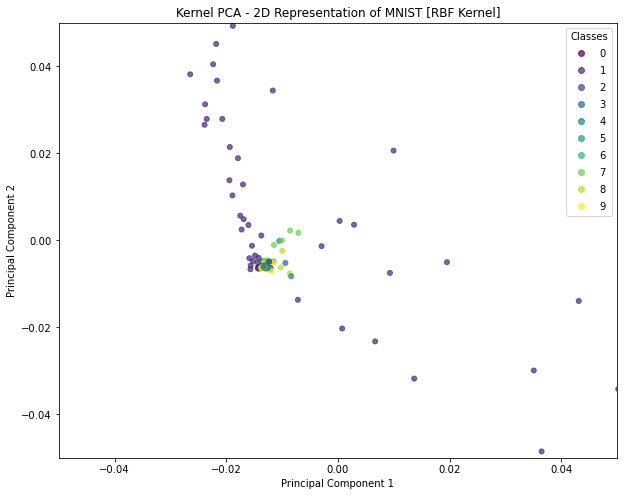

In [4]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_kpca_train[:, 0], X_kpca_train[:, 1], c=y_train, s=100, marker='.', alpha=0.7)
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Kernel PCA - 2D Representation of MNIST [RBF Kernel]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim([-0.05,0.05])
plt.ylim([-0.05,0.05])
plt.savefig("plots/kpca.png")
plt.show()